In [1]:
from langchain_community.document_loaders import TextLoader
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders import WikipediaLoader

from langchain_community.document_loaders import WebBaseLoader

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [2]:
web_loader = WebBaseLoader(web_path='https://www.google.com')
web_loader.load()

[Document(metadata={'source': 'https://www.google.com', 'title': 'Google', 'language': 'en-IN'}, page_content='GoogleSearch Images Maps Play YouTube News Gmail Drive More »Web History | Settings | Sign in\xa0Advanced searchGoogle offered in:  हिन्दी বাংলা తెలుగు मराठी தமிழ் ગુજરાતી ಕನ್ನಡ മലയാളം ਪੰਜਾਬੀ AdvertisingBusiness SolutionsAbout GoogleGoogle.co.in© 2026 - Privacy - Terms')]

In [3]:
###### General Python way 
# To download any webcontent (<html>..</html> + Json)
#
import requests
r = requests.get('https://www.google.com')
r.status_code

200

In [4]:
# To get the web URL - header information
r.headers

{'Date': 'Wed, 28 Jan 2026 04:31:40 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'Content-Security-Policy-Report-Only': "object-src 'none';base-uri 'self';script-src 'nonce-h86RfBAFFX0CTfEtaoYsGA' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp", 'Accept-CH': 'Sec-CH-Prefers-Color-Scheme', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '__Secure-STRP=AD6DogvAiCSbRs6_oYpuWwc7HCBlCUOGmPxQOECwF4JP5NC6_gPss7sBAd8gSW87Dm1rfT0HtgBPfChZIdqQVXCpYDAB0ibq0yj4; expires=Wed, 28-Jan-2026 04:36:40 GMT; path=/; domain=.google.com; Secure; SameSite=strict, AEC=AaJma5ut4zil6z2z97AvZhKMBkqLp0vkS9W1_qwUzFgFv9Qhd7tYDUbzog; expires=Mon, 27-Jul-2026 04:31:40 GMT; path=/; domain=.google.com; Secure; HttpOnly; SameSite=lax

In [6]:
web_page = r.text # download the webcontent

In [7]:
# Testing - create new html file - write downloaded content to file
with open('test.html','w') as wobj:
    wobj.write(web_page)

In [9]:
r1 = requests.get('https://api.github.com/users/hadley/orgs')
r1.headers['Content-Type']


'application/json; charset=utf-8'

In [10]:
python_data = r1.json()

In [11]:
print(type(python_data))

<class 'list'>


In [12]:
python_data[0]

{'login': 'ggobi',
 'id': 423638,
 'node_id': 'MDEyOk9yZ2FuaXphdGlvbjQyMzYzOA==',
 'url': 'https://api.github.com/orgs/ggobi',
 'repos_url': 'https://api.github.com/orgs/ggobi/repos',
 'events_url': 'https://api.github.com/orgs/ggobi/events',
 'hooks_url': 'https://api.github.com/orgs/ggobi/hooks',
 'issues_url': 'https://api.github.com/orgs/ggobi/issues',
 'members_url': 'https://api.github.com/orgs/ggobi/members{/member}',
 'public_members_url': 'https://api.github.com/orgs/ggobi/public_members{/member}',
 'avatar_url': 'https://avatars.githubusercontent.com/u/423638?v=4',
 'description': ''}

In [ ]:
# To Extract data from html tag - webscraping  - use bs4 module

# requests - download only 
# bs4   - webscraping 

import bs4
soup_obj = bs4.BeautifulSoup(<WebPageContent>) <== class Name
|
|
|--> soup_obj.<htmlTag> -->data  <=== ( 1)
|
|--> soup_obj.find(<htmlTag>) ---> data <== (2)
|
|--> soup_obj.find_all(<htmlTag>) --> [data...] <== (3)
|
|---> <h1>  <-- parent
        <p> <--- current tag
        <h2>.. <-- child
        </h2> 
      </h1> 
soup_obj.<htmlTag>.parent
soup_obj.<htmlTag>.children 
..


In [13]:
import requests
r = requests.get('https://www.google.com')
web_page = r.text

import bs4
soup_obj = bs4.BeautifulSoup(web_page)

In [14]:
soup_obj.title

<title>Google</title>

In [15]:
soup_obj.find('title')

<title>Google</title>

In [16]:
soup_obj.find('p')

<p style="font-size:8pt;color:#636363">© 2026 - <a href="/intl/en/policies/privacy/">Privacy</a> - <a href="/intl/en/policies/terms/">Terms</a></p>

In [17]:
soup_obj.find_all('p')

[<p style="font-size:8pt;color:#636363">© 2026 - <a href="/intl/en/policies/privacy/">Privacy</a> - <a href="/intl/en/policies/terms/">Terms</a></p>]

In [20]:
soup_obj.find('p').text

'© 2026 - Privacy - Terms'

In [22]:
soup_obj.find('p')['style'] # apply dict logic - dictName['key']  ->Value <--- dictName.get('Key')

'font-size:8pt;color:#636363'

In [23]:
soup_obj.find('p')

<p style="font-size:8pt;color:#636363">© 2026 - <a href="/intl/en/policies/privacy/">Privacy</a> - <a href="/intl/en/policies/terms/">Terms</a></p>

In [24]:
soup_obj.find('a')

<a class="gb1" href="https://www.google.com/imghp?hl=en&amp;tab=wi">Images</a>

In [25]:
soup_obj.find('a')['href']

'https://www.google.com/imghp?hl=en&tab=wi'

In [26]:
# To get list of all the URLs from google.com
soup_obj.find_all('a')

[<a class="gb1" href="https://www.google.com/imghp?hl=en&amp;tab=wi">Images</a>,
 <a class="gb1" href="https://maps.google.co.in/maps?hl=en&amp;tab=wl">Maps</a>,
 <a class="gb1" href="https://play.google.com/?hl=en&amp;tab=w8">Play</a>,
 <a class="gb1" href="https://www.youtube.com/?tab=w1">YouTube</a>,
 <a class="gb1" href="https://news.google.com/?tab=wn">News</a>,
 <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a>,
 <a class="gb1" href="https://drive.google.com/?tab=wo">Drive</a>,
 <a class="gb1" href="https://www.google.co.in/intl/en/about/products?tab=wh" style="text-decoration:none"><u>More</u> »</a>,
 <a class="gb4" href="http://www.google.co.in/history/optout?hl=en">Web History</a>,
 <a class="gb4" href="/preferences?hl=en">Settings</a>,
 <a class="gb4" href="https://accounts.google.com/ServiceLogin?hl=en&amp;passive=true&amp;continue=https://www.google.com/&amp;ec=GAZAAQ" id="gb_70" target="_top">Sign in</a>,
 <a href="/advanced_search?hl=en-IN&amp;authuser=

In [28]:
for var in soup_obj.find_all('a'):
    print(var.get('href'))

https://www.google.com/imghp?hl=en&tab=wi
https://maps.google.co.in/maps?hl=en&tab=wl
https://play.google.com/?hl=en&tab=w8
https://www.youtube.com/?tab=w1
https://news.google.com/?tab=wn
https://mail.google.com/mail/?tab=wm
https://drive.google.com/?tab=wo
https://www.google.co.in/intl/en/about/products?tab=wh
http://www.google.co.in/history/optout?hl=en
/preferences?hl=en
https://accounts.google.com/ServiceLogin?hl=en&passive=true&continue=https://www.google.com/&ec=GAZAAQ
/advanced_search?hl=en-IN&authuser=0
https://www.google.com/setprefs?sig=0_51G-gZMw-5AycdHF7obAYL-13sU%3D&hl=hi&source=homepage&sa=X&ved=0ahUKEwiWgpXOt62SAxWgT0EAHRLaIJEQ2ZgBCAY
https://www.google.com/setprefs?sig=0_51G-gZMw-5AycdHF7obAYL-13sU%3D&hl=bn&source=homepage&sa=X&ved=0ahUKEwiWgpXOt62SAxWgT0EAHRLaIJEQ2ZgBCAc
https://www.google.com/setprefs?sig=0_51G-gZMw-5AycdHF7obAYL-13sU%3D&hl=te&source=homepage&sa=X&ved=0ahUKEwiWgpXOt62SAxWgT0EAHRLaIJEQ2ZgBCAg
https://www.google.com/setprefs?sig=0_51G-gZMw-5AycdHF7obAYL

In [30]:
for var in soup_obj.find_all('a'):
    print(var.text)

Images
Maps
Play
YouTube
News
Gmail
Drive
More »
Web History
Settings
Sign in
Advanced search
हिन्दी
বাংলা
తెలుగు
मराठी
தமிழ்
ગુજરાતી
ಕನ್ನಡ
മലയാളം
ਪੰਜਾਬੀ
Advertising
Business Solutions
About Google
Google.co.in
Privacy
Terms


In [31]:
soup_obj.find('a')

<a class="gb1" href="https://www.google.com/imghp?hl=en&amp;tab=wi">Images</a>

In [32]:
soup_obj.find('a').get('href')

'https://www.google.com/imghp?hl=en&tab=wi'

In [34]:
soup_obj.find('a').text

'Images'

In [ ]:
##########################################################

In [ ]:
from langchain_community.document_loaders import WebBaseLoader

To extract specific tag from webpage
|
import bs4

bs_kwargs = dict(parse_only=bs4.SoupStrainer(class_=("<inpuTag1>,<inputTag2>,<inputTag3>,....<inputTagN>")) 

web_loader = WebBaseLoader(web_path='URL')
Vs
web_loader = WebBaseLoader(web_path='URL',bs_kwargs=dict(parse_only=bs4.SoupStrainer(class_=("<inpuTag1>,<inputTag2>,<inputTag3>,....<inputTagN>"))))

In [35]:
URL='https://lilianweng.github.io/posts/2023-06-23-agent/'
loader = WebBaseLoader(web_path=(URL),bs_kwargs=dict(parse_only=bs4.SoupStrainer(class_=("post-title"))))
loader.load()

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='\n      LLM Powered Autonomous Agents\n    ')]

In [36]:
loader = WebBaseLoader(web_path=(URL),bs_kwargs=dict(parse_only=bs4.SoupStrainer(class_=("post-content"))))
loader.load()

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/'}, page_content='Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview#\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would consi

In [48]:
URL='https://www.google.com/search?q=python+bs4'
loader = WebBaseLoader(web_path=(URL),bs_kwargs=dict(parse_only=bs4.SoupStrainer(class_=("a"))))
loader.load()

[Document(metadata={'source': 'https://www.google.com/search?q=python+bs4'}, page_content='')]

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders import WikipediaLoader
from langchain_community.document_loaders import WebBaseLoader
|
|
After loading data from <Source>
|
Split data into multiple chunks 
               ==================

In [49]:
from langchain.text_splitter import CharacterTextSplitter

In [50]:
text = '''RAG improves llm response by combining retrieval with generation.
It helps models answer questions using private or external data.'''

splitter = CharacterTextSplitter(chunk_size=50,chunk_overlap=10)

chunks = splitter.split_text(text)
for var in chunks:
    print(var)

RAG improves llm response by combining retrieval with generation.
It helps models answer questions using private or external data.


In [53]:
text = '''RAG improves llm response by combining retrieval with generation.
It helps models answer questions using private or external data.'''

splitter = CharacterTextSplitter(chunk_size=10,chunk_overlap=5)

chunks = splitter.split_text(text)
for var in chunks:
    print(var)

RAG improves llm response by combining retrieval with generation.
It helps models answer questions using private or external data.


In [55]:
msg="langchain helps developers build applications"
CharacterTextSplitter(chunk_size=100,chunk_overlap=20).split_text(msg)

['langchain helps developers build applications']

In [59]:
CharacterTextSplitter(chunk_size=10,chunk_overlap=2,separator=' ').split_text(msg)

['langchain', 'helps', 'developers', 'build', 'applications']

In [60]:
CharacterTextSplitter().split_text(msg)

['langchain helps developers build applications']

In [62]:
# Step-1
from langchain_community.document_loaders import TextLoader
loader = TextLoader('my_docs.txt')
docs = loader.load()

# Step-2
from langchain_text_splitters import CharacterTextSplitter
split_obj = CharacterTextSplitter(chunk_size=100,chunk_overlap=20)
split_obj.split_documents(docs)

Created a chunk of size 467, which is longer than the specified 100


[Document(metadata={'source': 'my_docs.txt'}, page_content='LangChain is a framework for developing applications powered by large language models (LLMs).'),
 Document(metadata={'source': 'my_docs.txt'}, page_content='LangChain simplifies every stage of the LLM application lifecycle:'),
 Document(metadata={'source': 'my_docs.txt'}, page_content="Development: Build your applications using LangChain's open-source components and third-party integrations. Use LangGraph to build stateful agents with first-class streaming and human-in-the-loop support.\nProductionization: Use LangSmith to inspect, monitor and evaluate your applications, so that you can continuously optimize and deploy with confidence.\nDeployment: Turn your LangGraph applications into production-ready APIs and Assistants with LangGraph Platform."),
 Document(metadata={'source': 'my_docs.txt'}, page_content='factorial value 5! is 120')]

In [63]:
# Step-1
from langchain_community.document_loaders import TextLoader
loader = TextLoader('my_docs.txt')
docs = loader.load()

# Step-2
from langchain_text_splitters import CharacterTextSplitter
split_obj = CharacterTextSplitter(chunk_size=500,chunk_overlap=50)
split_obj.split_documents(docs)

[Document(metadata={'source': 'my_docs.txt'}, page_content='LangChain is a framework for developing applications powered by large language models (LLMs).\n\nLangChain simplifies every stage of the LLM application lifecycle:'),
 Document(metadata={'source': 'my_docs.txt'}, page_content="Development: Build your applications using LangChain's open-source components and third-party integrations. Use LangGraph to build stateful agents with first-class streaming and human-in-the-loop support.\nProductionization: Use LangSmith to inspect, monitor and evaluate your applications, so that you can continuously optimize and deploy with confidence.\nDeployment: Turn your LangGraph applications into production-ready APIs and Assistants with LangGraph Platform.\n\nfactorial value 5! is 120")]

In [64]:
# Step-1
from langchain_community.document_loaders import TextLoader
loader = TextLoader('my_docs.txt')
docs = loader.load()

# Step-2
from langchain_text_splitters import CharacterTextSplitter
split_obj = CharacterTextSplitter(chunk_size=50,chunk_overlap=5)
split_obj.split_documents(docs)

Created a chunk of size 93, which is longer than the specified 50
Created a chunk of size 66, which is longer than the specified 50
Created a chunk of size 467, which is longer than the specified 50


[Document(metadata={'source': 'my_docs.txt'}, page_content='LangChain is a framework for developing applications powered by large language models (LLMs).'),
 Document(metadata={'source': 'my_docs.txt'}, page_content='LangChain simplifies every stage of the LLM application lifecycle:'),
 Document(metadata={'source': 'my_docs.txt'}, page_content="Development: Build your applications using LangChain's open-source components and third-party integrations. Use LangGraph to build stateful agents with first-class streaming and human-in-the-loop support.\nProductionization: Use LangSmith to inspect, monitor and evaluate your applications, so that you can continuously optimize and deploy with confidence.\nDeployment: Turn your LangGraph applications into production-ready APIs and Assistants with LangGraph Platform."),
 Document(metadata={'source': 'my_docs.txt'}, page_content='factorial value 5! is 120')]

In [65]:
html_str = '''
<html>
<body>
<div>
<h1>msg1</h1>
<p>some sample test</p>
<div>
<h2>msg2</h2>
<p>about home</p>
</div>
<br>
<p>outer text</p>
</div>
</body>
</html>'''

In [66]:
from langchain_text_splitters import HTMLHeaderTextSplitter

In [67]:
HTMLHeaderTextSplitter([('h2','Header 2')]).split_text(html_str)

[Document(metadata={}, page_content='msg1  \nsome sample test'),
 Document(metadata={'Header 2': 'msg2'}, page_content='msg2'),
 Document(metadata={}, page_content='about home  \nouter text')]

In [68]:
L=[('h1','Header 1'),('h2','Header 2'),('h3','Header 3')]
HTMLHeaderTextSplitter(L).split_text(html_str)

[Document(metadata={'Header 1': 'msg1'}, page_content='msg1'),
 Document(metadata={'Header 1': 'msg1'}, page_content='some sample test'),
 Document(metadata={'Header 1': 'msg1', 'Header 2': 'msg2'}, page_content='msg2'),
 Document(metadata={'Header 1': 'msg1'}, page_content='about home  \nouter text')]

In [69]:
splitted_Data = HTMLHeaderTextSplitter(L).split_text_from_url('https://www.python.org')
len(splitted_Data)

27

In [70]:
splitted_Data

[Document(metadata={}, page_content='end #touchnav-wrapper  \nSister Site Links Header elements end #content .content-wrapper Footer and social media list  \nThis page displays a fallback because interactive scripts did not run. Possible causes include disabled JavaScript or failure to load scripts or stylesheets.  \nNotice:  \nSkip to content  \nClose  \n▼  \nPython  \nPSF  \nDocs  \nPyPI  \nJobs  \nCommunity  \nThe Python Network  \n▲  \nend .container  \nend options-bar  \nDonate  \nMenu  \n≡  \nSearch This Site  \nGO  \nA  \nA  \nSmaller  \nLarger  \nReset  \nSocialize  \nLinkedIn  \nMastodon  \nChat on IRC  \nTwitter  \nAbout  \nApplications  \nQuotes  \nGetting Started  \nHelp  \nPython Brochure  \nDownloads  \nAll releases  \nSource code  \nWindows  \nmacOS  \nAndroid  \nOther Platforms  \nLicense  \nAlternative Implementations  \nDocumentation  \nDocs  \nAudio/Visual Talks  \nBeginner\'s Guide  \nFAQ  \nNon-English Docs  \nPEP Index  \nPython Books  \nPython Essays  \nCommunity

In [71]:
## Create Embedding 

from langchain_community.embeddings import OllamaEmbeddings 
embedded_obj = OllamaEmbeddings(model='nomic-embed-text:latest')

vectors = embedded_obj.embed_query('hello')
len(vectors)

C:\Users\karth\AppData\Local\Temp\ipykernel_31980\2513271400.py:4: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaEmbeddings``.
  embedded_obj = OllamaEmbeddings(model='nomic-embed-text:latest')


768

In [72]:
vectors = embedded_obj.embed_query('banana')
len(vectors)

768

In [73]:
v1 = embedded_obj.embed_query('computer')
v2 = embedded_obj.embed_query('laptop')
v3 = embedded_obj.embed_query('banana')
print(len(v1),len(v2),len(v3))

768 768 768


In [74]:
print(v1[:5])
print(v2[:5])
print(v3[:5])

[0.48705393075942993, 2.2030575275421143, -3.2798659801483154, -0.4946111738681793, 0.38576364517211914]
[-0.21646538376808167, 1.9665523767471313, -3.0909461975097656, 0.4591161608695984, 1.093442678451538]
[1.0421364307403564, 1.4326108694076538, -3.6061129570007324, -0.06276639550924301, 0.4181695580482483]


In [ ]:
VectorStorage - VectorDatabase - FAISS 
				  - VectorDB 
				  - In memory based process

from langchain_community.vectorstores import FAISS
FAISS.from_documents(<chunk_data>,<embedded_object>) -->stored_to_vector_db


In [2]:
# Step - 1
from langchain_community.document_loaders import TextLoader 
loader = TextLoader("my_docs.txt")
docs = loader.load()

# Step - 2
from langchain_text_splitters import CharacterTextSplitter
splitted_obj = CharacterTextSplitter(chunk_size=100,chunk_overlap=20)
splitted_docs = splitted_obj.split_documents(docs)

# Step -3 
from langchain_community.embeddings import OllamaEmbeddings
embedded_obj = OllamaEmbeddings(model="nomic-embed-text:latest")



Created a chunk of size 467, which is longer than the specified 100


In [3]:
# Step-4
from langchain_community.vectorstores import FAISS
vecro_db = FAISS.from_documents(splitted_docs,embedded_obj)

In [4]:
vecro_db

In [5]:
vecro_db.similarity_search('what is langchain?')

[Document(id='2d63e800-f69c-49d1-a519-5fb6b7999f09', metadata={'source': 'my_docs.txt'}, page_content='LangChain is a framework for developing applications powered by large language models (LLMs).'),
 Document(id='b21f62ea-bb03-4116-870f-357e2d96adf7', metadata={'source': 'my_docs.txt'}, page_content='LangChain simplifies every stage of the LLM application lifecycle:'),
 Document(id='68d4d71c-6bee-48e0-9904-8eff37a7d59c', metadata={'source': 'my_docs.txt'}, page_content="Development: Build your applications using LangChain's open-source components and third-party integrations. Use LangGraph to build stateful agents with first-class streaming and human-in-the-loop support.\nProductionization: Use LangSmith to inspect, monitor and evaluate your applications, so that you can continuously optimize and deploy with confidence.\nDeployment: Turn your LangGraph applications into production-ready APIs and Assistants with LangGraph Platform."),
 Document(id='ac8fcd60-1faf-4749-9796-2ec39d3219bf'

In [6]:
vecro_db.similarity_search('how to calculate sum of two numbers?')

[Document(id='ac8fcd60-1faf-4749-9796-2ec39d3219bf', metadata={'source': 'my_docs.txt'}, page_content='factorial value 5! is 120'),
 Document(id='68d4d71c-6bee-48e0-9904-8eff37a7d59c', metadata={'source': 'my_docs.txt'}, page_content="Development: Build your applications using LangChain's open-source components and third-party integrations. Use LangGraph to build stateful agents with first-class streaming and human-in-the-loop support.\nProductionization: Use LangSmith to inspect, monitor and evaluate your applications, so that you can continuously optimize and deploy with confidence.\nDeployment: Turn your LangGraph applications into production-ready APIs and Assistants with LangGraph Platform."),
 Document(id='b21f62ea-bb03-4116-870f-357e2d96adf7', metadata={'source': 'my_docs.txt'}, page_content='LangChain simplifies every stage of the LLM application lifecycle:'),
 Document(id='2d63e800-f69c-49d1-a519-5fb6b7999f09', metadata={'source': 'my_docs.txt'}, page_content='LangChain is a f

In [8]:
vecro_db.similarity_search('how to calculate sum of two numbers?',k=2)

[Document(id='ac8fcd60-1faf-4749-9796-2ec39d3219bf', metadata={'source': 'my_docs.txt'}, page_content='factorial value 5! is 120'),
 Document(id='68d4d71c-6bee-48e0-9904-8eff37a7d59c', metadata={'source': 'my_docs.txt'}, page_content="Development: Build your applications using LangChain's open-source components and third-party integrations. Use LangGraph to build stateful agents with first-class streaming and human-in-the-loop support.\nProductionization: Use LangSmith to inspect, monitor and evaluate your applications, so that you can continuously optimize and deploy with confidence.\nDeployment: Turn your LangGraph applications into production-ready APIs and Assistants with LangGraph Platform.")]

Text(10, 100, 'Data1')

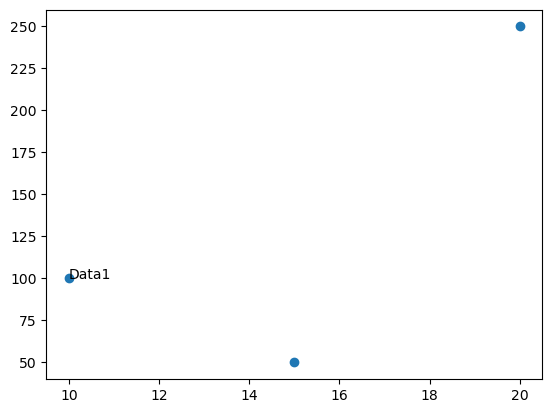

In [4]:
import matplotlib.pyplot as plt
plt.scatter([10,15,20],[100,50,250])
plt.text(10,100,"Data1")

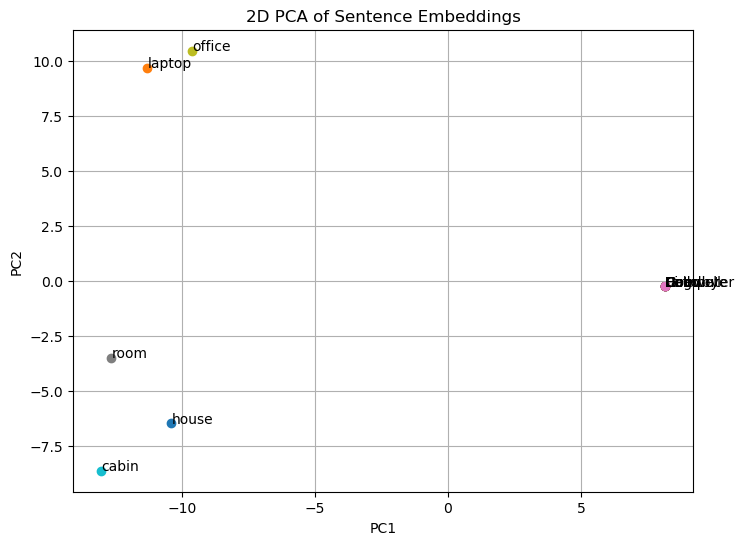

In [7]:
from langchain_community.embeddings import OllamaEmbeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get embeddings for multiple queries
embedding = OllamaEmbeddings(model='nomic-embed-text:latest')


sentences = ["Hello", "Hi", "Goodbye", "Farewell", "Dog", "Cat", "Computer","room","office",
             "cabin","house","laptop"]
vectors = [embedding.embed_query(s) for s in sentences]

# Reduce to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(8, 6))
for i, point in enumerate(reduced):
    plt.scatter(point[0], point[1])
    plt.text(point[0]+0.01, point[1]+0.01, sentences[i])
plt.title("2D PCA of Sentence Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()